In [1]:
import numpy as np
import pandas as pd 

# 数据分析基础---工具：pandas

- pandas是基于NumPy构建的的一种工具，该工具是为了解决数据分析任务（包括：汇总和计算描述统计，处理缺失数据 ，层次化索引清理、转换、合并、重塑、GroupBy技术日期和时间数据类型及工具等）而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。最具有统计意味的工具包，某些方面优于R软件。

### 一、pandas---数据结构
- pandas包含两种主要的数据结构：Series/DataFrame，为处理数据提供可靠易用的基础。其中pandas产生的index对象是不可修改的。
- 当然pandas还又更高级的Panel数据结构（三维），但由于层次化索引的存在，所以一般不使用。

#### 1.Series
- 是类似于一维数组的对象，由一组数据（各种numpy数据类型）以及一组与之相关的数据标签（索引）组成。

- 创建Series（index、values）
    - 自动创建：
    - 手动创建：
    - 字典创建：
- index、values属性:查看索引及值,都可以通过赋值进行就地修改。    

In [3]:
import pandas as pd 
a = pd.Series((1,2,3,4,4))

b = pd.Series([1,2,3,4,4],index = [1,2,3,4,5])

print(a,b,b[1],a.index,a.values)

b.index = [6,2,3,4,5]

print (b)

b[6] = 6
print(b)

0    1
1    2
2    3
3    4
4    4
dtype: int64 1    1
2    2
3    3
4    4
5    4
dtype: int64 1 RangeIndex(start=0, stop=5, step=1) [1 2 3 4 4]
6    1
2    2
3    3
4    4
5    4
dtype: int64
6    6
2    2
3    3
4    4
5    4
dtype: int64


#### 2.DataFrame
- 是一种表格型数据结构，既有行索引，又有列索引，可以看成Series组成的字典。

- 创建DataFrame：
    - x = pd.DataFrame(data,index,columns)
    - 一般来说，对结构化数据进行读入的时候直接进行创建DataFrame，此处有关知识点请查看数据处理章节。
- 通过赋值的方式进行修改(按列修改),也可以进行精确匹配进行修改。

In [25]:
data = {"a":['1','2','3'],"b":[11,22,33],"c":[666,777,888]}
x = pd.DataFrame(data)  #行索引如果没有指定将会自动创建
print(x)

x["c"] = np.arange(3)
print(x)

x["a"]# 获取为Series，索引一致。

   a   b    c
0  1  11  666
1  2  22  777
2  3  33  888
   a   b  c
0  1  11  0
1  2  22  1
2  3  33  2


0    1
1    2
2    3
Name: a, dtype: object

In [31]:
data = np.random.randn(5,4)
x = pd.DataFrame(data,index = [1,2,3,4,5],columns = ['a','b','c','d'])
print(data)
print(x)

[[ 0.25717888 -0.29753958  0.70240497 -0.23737815]
 [-1.00923988 -1.6143801  -0.29216915 -0.38991105]
 [-1.34910122  0.11719139  0.75715047  1.08839029]
 [ 0.454524    1.6378244   0.06807045 -0.00544825]
 [-0.37140414  0.68818805  0.86592221  0.3172386 ]]
          a         b         c         d
1  0.257179 -0.297540  0.702405 -0.237378
2 -1.009240 -1.614380 -0.292169 -0.389911
3 -1.349101  0.117191  0.757150  1.088390
4  0.454524  1.637824  0.068070 -0.005448
5 -0.371404  0.688188  0.865922  0.317239


### 二、pandas---基本功能

In [7]:
d1 = pd.DataFrame(np.arange(12).reshape(3,4),columns = list("abcd"))
d2 = pd.DataFrame(np.arange(20).reshape(4,5),columns = list("abcde"))
print(d1)
print(d2)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


#### 1.索引与选取
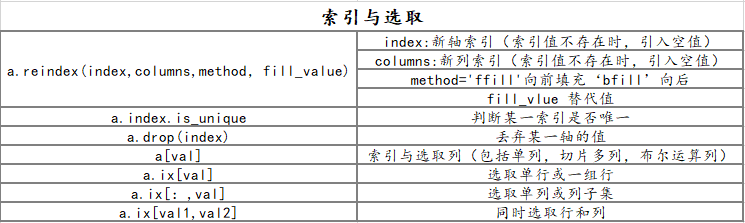

In [4]:
d3 = pd.DataFrame(np.arange(12).reshape(3,4),columns = list("abcd"))
d4 = pd.DataFrame(np.arange(20).reshape(4,5),columns = list("abcde"))
print(d3.reindex(index = np.arange(3),columns = ["a","c","b"]))
print(d3.index.is_unique)
print(d4.drop([1,2]))# 连同索引以及值都删去
print(d3["a"])

   a   c  b
0  0   2  1
1  4   6  5
2  8  10  9
True
    a   b   c   d   e
0   0   1   2   3   4
3  15  16  17  18  19
0    0
1    4
2    8
Name: a, dtype: int32


In [6]:
# 泰坦尼克数据
df = pd.read_csv(r"C:\Users\Administrator\Desktop\111\test.csv")
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [19]:
#选取某一列
print(df.Age)
print(df["Age"])
#选取某一行
print(df.ix[1])#以列表形式传入index
# 同时选取多行和多列，注意括号形式是方括号。
df.ix[1:4,["Age","Name"]]

PassengerId                                 893
Pclass                                        3
Name           Wilkes, Mrs. James (Ellen Needs)
Sex                                      female
Age                                          47
SibSp                                         1
Parch                                         0
Ticket                                   363272
Fare                                          7
Cabin                                       NaN
Embarked                                      S
Name: 1, dtype: object


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,Age,Name
1,47.0,"Wilkes, Mrs. James (Ellen Needs)"
2,62.0,"Myles, Mr. Thomas Francis"
3,27.0,"Wirz, Mr. Albert"
4,22.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


#### 2.算数运算与填充值
- 数据相加时自动对齐，不重叠处引入NA值，其索引是原索引的并集
- 算数运算时，当一个对象在某一轴标签在另外一对象中找不到时，可以填充一个特殊值(如：fill_value = 0),
- 用add，sub，mul，div（加减乘除）方法时，空值会被并集的值填充。
- 当DataFrame与series进行运算时，具有广播性。

In [21]:
x = d1 + d2
print(x)

d = d1.reindex(columns = d2.columns,fill_value = 0)
print(d)

b = d1.add(d2,fill_value =0)
print(b)

c = d1.mul(d2,fill_value =0)
print(c)

      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN
   a  b   c   d  e
0  0  1   2   3  0
1  4  5   6   7  0
2  8  9  10  11  0
      a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0  11.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0
      a     b      c      d    e
0   0.0   1.0    4.0    9.0  0.0
1  20.0  30.0   42.0   56.0  0.0
2  80.0  99.0  120.0  143.0  0.0
3   0.0   0.0    0.0    0.0  0.0


#### 3.排序
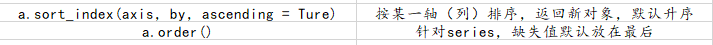
- axis选择行或列索引进行排序，by选择某一列按值进行排序

In [58]:
x = pd.DataFrame(np.arange(20).reshape(4,5),columns = list("abcde"))
print(x)
x.sort_index(axis = 0,ascending = False)

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


,a,b,c,d,e
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


### 三、pandas---汇总与描述统计
- 汇总与描述统计方法用于从series中提取一个值（sum等），或者从一个DataFrame的行和列中提取一个series
- **这些数学统计方法是基于没有缺失值的数据假设而构建的**
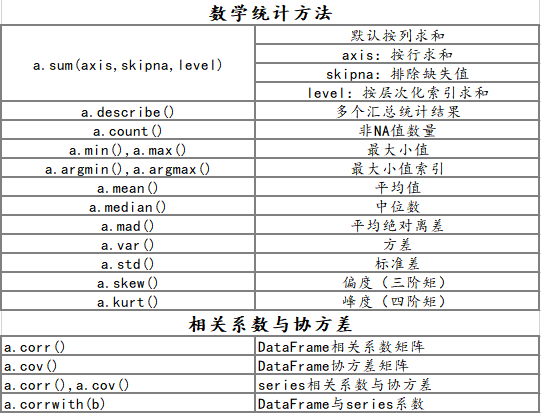

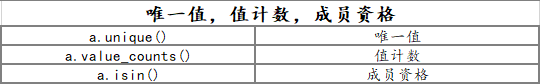

In [15]:
x = pd.DataFrame(np.arange(20).reshape(4,5),columns = list("abcde"))
print(x)
c = x.sum()
d = x.sum(axis = 0)
e = x.sum(axis = 1)
print(c,d,e)
print(x.describe())
print(x.skew(),x.kurt())
print(x.corr())

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
a    30
b    34
c    38
d    42
e    46
dtype: int64 a    30
b    34
c    38
d    42
e    46
dtype: int64 0    10
1    35
2    60
3    85
dtype: int64
               a          b          c          d          e
count   4.000000   4.000000   4.000000   4.000000   4.000000
mean    7.500000   8.500000   9.500000  10.500000  11.500000
std     6.454972   6.454972   6.454972   6.454972   6.454972
min     0.000000   1.000000   2.000000   3.000000   4.000000
25%     3.750000   4.750000   5.750000   6.750000   7.750000
50%     7.500000   8.500000   9.500000  10.500000  11.500000
75%    11.250000  12.250000  13.250000  14.250000  15.250000
max    15.000000  16.000000  17.000000  18.000000  19.000000
a    0.0
b    0.0
c    0.0
d    0.0
e    0.0
dtype: float64 a   -1.2
b   -1.2
c   -1.2
d   -1.2
e   -1.2
dtype: float64
     a    b    c    d    e
a  1.0  1.0  1.0  1.0  1.0
b  1.0  1.0  1.0

### 四、pandas---处理缺失数据
- pandas设计的目标之一就是让缺失值任务处理起来更加轻松，其使用浮点值NAN表示浮点和非浮点数组中的缺失数据，它只是一个便于检测出来的标记而已。
- 常见的NA值处理方法：
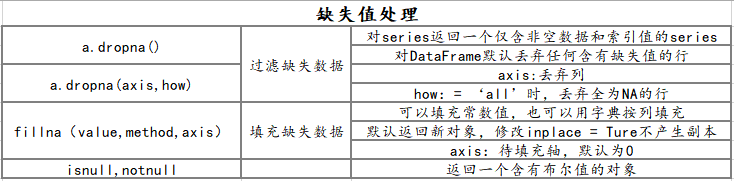

In [23]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\111.csv",encoding = "gbk",names = ['a','b','c','d'])
x = pd.DataFrame(df)
print(x)

      a     b     c     d
0  33.0  23.0  66.0  34.0
1  56.0  23.0  23.0   NaN
2  89.0  87.0   NaN  22.0
3   NaN   NaN   NaN   NaN
4  12.0   NaN   NaN   NaN


In [28]:
s = x.dropna()
k = x.dropna(axis = 0,how = 'all')
l = x.dropna(axis = 1)
print(s)
print(k)
print(l)
print(x.isnull())

      a     b     c     d
0  33.0  23.0  66.0  34.0
      a     b     c     d
0  33.0  23.0  66.0  34.0
1  56.0  23.0  23.0   NaN
2  89.0  87.0   NaN  22.0
4  12.0   NaN   NaN   NaN
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
       a      b      c      d
0  False  False  False  False
1  False  False  False   True
2  False  False   True  False
3   True   True   True   True
4  False   True   True   True
